# World Energy Consumption: A Data-Driven Analysis (1965-2023)

### Project Overview
This notebook presents a comprehensive analysis of global energy consumption trends from 1965 to 2023. Using a dataset from Kaggle, we will perform data cleaning, exploratory data analysis (EDA), and visualization to uncover key insights into how energy usage has evolved across different countries and regions over nearly six decades.

**Key Questions Addressed:**
1.  How has energy consumption changed for specific countries over time?
2.  Which countries were the top energy consumers in any given year?
3.  Which countries have shown the highest growth in energy consumption since 1965?
4.  Who are the leading energy consumers—both countries and regions—in the most recent year, 2023?

Let's begin by setting up our environment.

## 1. Setup: Importing Libraries and Loading Data

First, we import the necessary Python libraries for data manipulation (`pandas`, `numpy`) and visualization (`matplotlib`, `seaborn`). Then, we load our dataset into a pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# The dataset should be in a 'Data/' subfolder for good project organization.
# If your file is in the same directory as the notebook, you can just use the filename.
try:
    data = pd.read_csv("Data/World_Energy_By_Country_And_Region_1965_to_2023.csv")
except FileNotFoundError:
    # Fallback for when the 'Data' folder doesn't exist, and the file is in the root
    data = pd.read_csv("World_Energy_By_Country_And_Region_1965_to_2023.csv")

data.head()

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,5.00,5.32,5.57,5.92,6.28,6.73,6.94,7.47,8.11,...,14.43,14.47,14.34,14.54,14.72,14.64,13.76,13.92,14.30,13.95
2,Mexico,1.06,1.12,1.14,1.24,1.36,1.45,1.53,1.69,1.82,...,8.03,7.94,8.11,8.26,8.15,8.07,7.35,7.83,8.18,8.45
3,US,51.98,54.89,56.80,60.19,63.30,65.54,66.92,70.25,73.22,...,93.59,92.69,92.62,92.97,96.37,95.68,88.64,93.44,95.42,94.28
4,Total North America,58.04,61.33,63.51,67.36,70.95,73.72,75.39,79.41,83.16,...,116.04,115.10,115.07,115.76,119.25,118.40,109.75,115.20,117.90,116.68


## 2. Data Cleaning and Preprocessing

A crucial first step in any analysis is to inspect and clean the data. We need to check for missing values, incorrect data types, and any structural issues.

**Initial Inspection:**
Let's use `.info()` to get a summary of our DataFrame.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  103 non-null    object
 1   1965     103 non-null    object
 2   1966     103 non-null    object
 3   1967     103 non-null    object
 4   1968     103 non-null    object
 5   1969     103 non-null    object
 6   1970     103 non-null    object
 7   1971     103 non-null    object
 8   1972     103 non-null    object
 9   1973     103 non-null    object
 10  1974     103 non-null    object
 11  1975     103 non-null    object
 12  1976     103 non-null    object
 13  1977     103 non-null    object
 14  1978     103 non-null    object
 15  1979     103 non-null    object
 16  1980     103 non-null    object
 17  1981     103 non-null    object
 18  1982     103 non-null    object
 19  1983     103 non-null    object
 20  1984     103 non-null    object
 21  1985     103 non-null    object
 22  19

**Observations:**
- All columns, including the years, have been loaded as the `object` data type. This is incorrect for numerical analysis and needs to be converted.
- There are 111 entries, but most columns have only 103 non-null values. This suggests there are rows that are entirely empty.

Let's confirm the null values.

In [4]:
data.isnull().sum()

Country    8
1965       8
1966       8
1967       8
1968       8
1969       8
1970       8
1971       8
1972       8
1973       8
1974       8
1975       8
1976       8
1977       8
1978       8
1979       8
1980       8
1981       8
1982       8
1983       8
1984       8
1985       8
1986       8
1987       8
1988       8
1989       8
1990       8
1991       8
1992       8
1993       8
1994       8
1995       8
1996       8
1997       8
1998       8
1999       8
2000       8
2001       8
2002       8
2003       8
2004       8
2005       8
2006       8
2007       8
2008       8
2009       8
2010       8
2011       8
2012       8
2013       8
2014       8
2015       8
2016       8
2017       8
2018       8
2019       8
2020       8
2021       8
2022       8
2023       8
dtype: int64

**Cleaning Steps:**
1.  **Drop Empty Rows:** The output above confirms that 8 rows are completely null across all columns. We will remove these.
2.  **Convert Data Types:** The year columns must be converted to a numeric type (float) to allow for calculations and plotting.

In [5]:
# Step 1: Drop rows where all columns are NaN
data.dropna(how='all', inplace=True)

# Reset the index to maintain a clean sequence after dropping rows
data.reset_index(drop=True, inplace=True)

# Step 2: Convert year columns to numeric, coercing errors will turn non-numeric values into NaN
for year in range(1965, 2024):
    data[str(year)] = pd.to_numeric(data[str(year)], errors='coerce')

# Verify the cleaning by checking the info again
print("Data summary after cleaning:")
data.info()

Data summary after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  103 non-null    object 
 1   1965     85 non-null     float64
 2   1966     86 non-null     float64
 3   1967     87 non-null     float64
 4   1968     87 non-null     float64
 5   1969     87 non-null     float64
 6   1970     87 non-null     float64
 7   1971     89 non-null     float64
 8   1972     89 non-null     float64
 9   1973     89 non-null     float64
 10  1974     89 non-null     float64
 11  1975     89 non-null     float64
 12  1976     89 non-null     float64
 13  1977     89 non-null     float64
 14  1978     89 non-null     float64
 15  1979     89 non-null     float64
 16  1980     89 non-null     float64
 17  1981     89 non-null     float64
 18  1982     89 non-null     float64
 19  1983     89 non-null     float64
 20  1984     89 non-null     

**Cleaning successful!** All year columns are now `float64`, and we have 103 non-null entries, indicating the empty rows were removed. The data is now ready for analysis.

---

## 3. Exploratory Data Analysis & Visualization

In this section, we will create reusable functions to visualize the data from different perspectives.

### 3.1. Consumption Trend for a Single Country

Let's create a function to plot the energy consumption trend for any given country over the entire 59-year period.

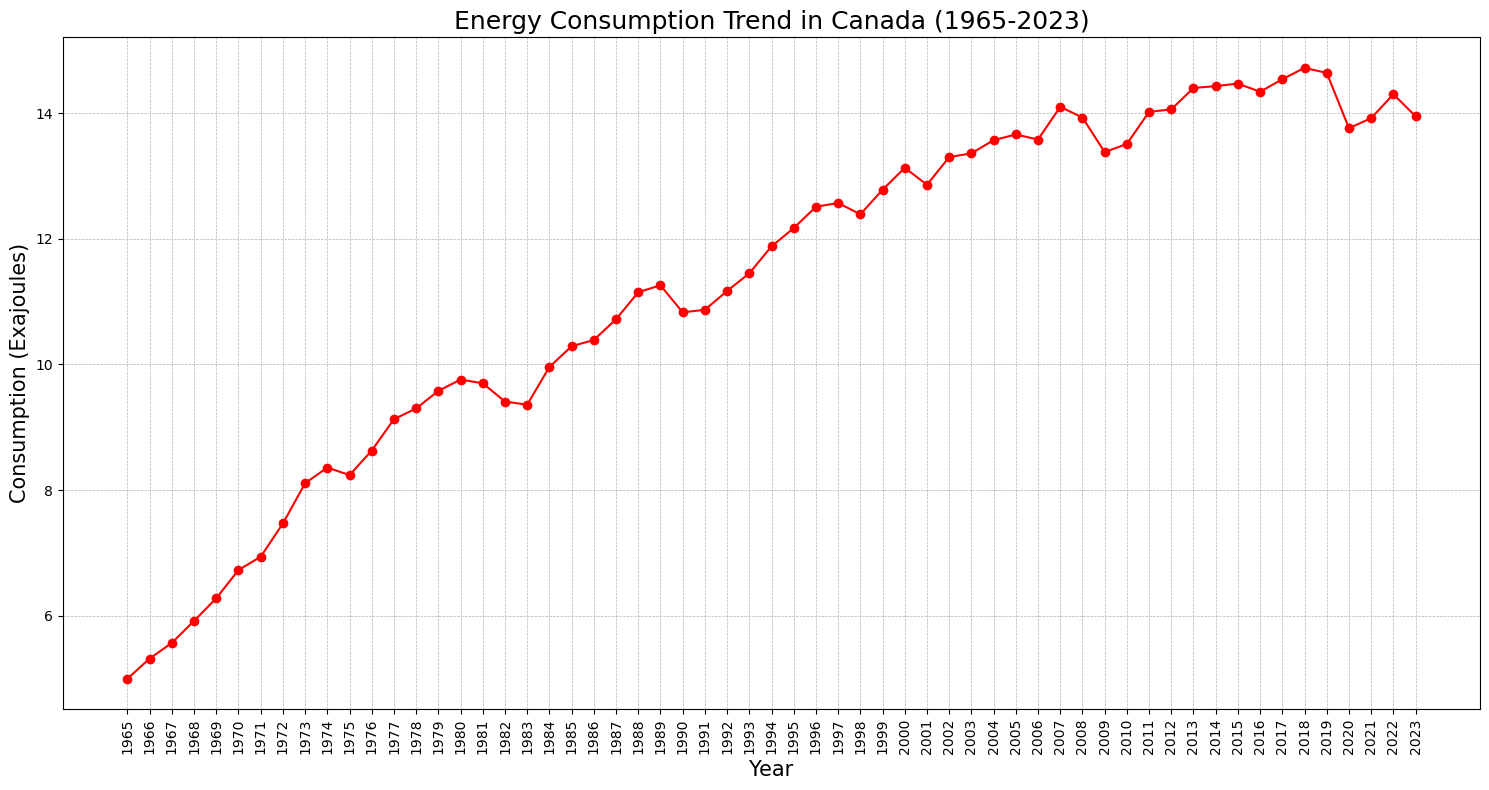

In [6]:
def country_consumption_energy(country):
    """
    Plots the energy consumption trend for a specific country from 1965 to 2023.

    Args:
        country (str): The name of the country to plot.
    """
    # Filter data for the specified country, drop the 'Country' column, and transpose it
    cleaned_data = data[data["Country"] == country].drop(columns="Country").T
    cleaned_data.columns = ['Consumption']

    # Create the plot
    plt.figure(figsize=(15, 8))
    plt.plot(cleaned_data.index, cleaned_data['Consumption'], marker='o', color='r', linestyle='-')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.title(f"Energy Consumption Trend in {country} (1965-2023)", fontsize=18)
    plt.xlabel("Year", fontsize=15)
    plt.ylabel("Consumption (Exajoules)", fontsize=15)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example: Plotting for Canada
country_consumption_energy("Canada")

**Analysis:**
The line chart for Canada shows a steady and consistent increase in energy consumption from 1965 until the late 2000s, reflecting its industrial growth. We can observe minor fluctuations and a noticeable dip around 2020, likely due to the economic slowdown during the COVID-19 pandemic, followed by a recovery.

### 3.2. Consumption Snapshot for a Single Year

Next, let's build a function to compare the energy consumption of all countries for a specific year. This gives us a snapshot of the global landscape at one point in time.

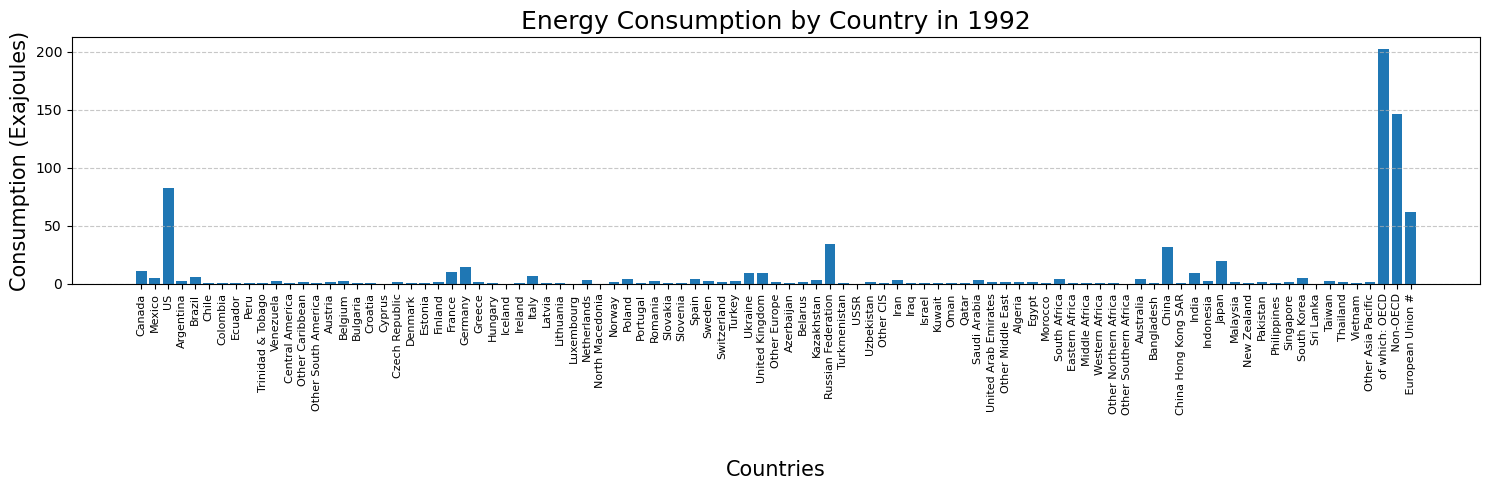

In [7]:
def year_consumption_energy(year):
    """
    Creates a bar chart comparing energy consumption across all countries for a given year.

    Args:
        year (str): The year to analyze (e.g., "1992").
    """
    plt.figure(figsize=(15, 5))
    # We only plot countries, so we filter out the regional totals first for a cleaner chart
    country_only_data = data[~data['Country'].str.contains('Total', na=False)]
    
    plt.bar(country_only_data["Country"].astype(str), country_only_data[year])
    plt.title(f"Energy Consumption by Country in {year}", fontsize=18)
    plt.xlabel("Countries", fontsize=15)
    plt.ylabel("Consumption (Exajoules)", fontsize=15)
    plt.xticks(rotation=90, fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example: Analyzing the year 1992
year_consumption_energy("1992")

**Analysis:**
The bar chart for 1992 clearly shows the dominance of the United States in energy consumption during that period, followed by other major industrial nations. This visualization is excellent for comparing the relative scale of energy usage across different countries at a specific moment in history.

### 3.3. Yearly Correlation Heatmap

A heatmap is a great tool to visualize the correlation between variables. Here, we'll check the correlation of energy consumption from year to year. A strong positive correlation would indicate that global consumption trends are generally consistent over time.

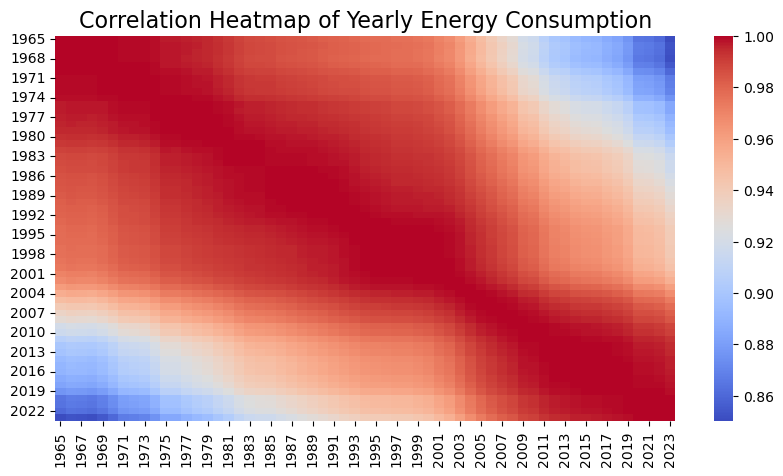

In [8]:
# We calculate the correlation only on the numeric (year) columns
correlation_matrix = data.drop(columns="Country").corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Yearly Energy Consumption", fontsize=16)
plt.show()

**Analysis:**
The heatmap is overwhelmingly bright red, indicating a very strong positive correlation (close to +1.0) between all years. This means that entities (countries/regions) that were high consumers in one year tended to remain high consumers in subsequent years. This high correlation confirms a consistent and generally upward trend in global energy consumption over the decades.

## 4. Deeper Analysis: Growth and Segmentation

Now, we'll perform more targeted analysis by calculating growth rates and separating the data into logical groups.

### 4.1. Energy Consumption Growth Rate (1965-2023)

Let's identify the countries with the highest percentage growth in energy consumption over the entire 59-year period. This highlights nations that have undergone significant industrialization or economic expansion.

Top 10 Countries by Energy Consumption Growth Rate (1965-2023):
        Country   Growth_Rate
65        Qatar  22100.000000
92  South Korea   4503.703704
95     Thailand   4454.545455
96      Vietnam   4345.454545
87     Malaysia   3908.333333
60         Iran   3531.428571
85    Indonesia   3270.000000
61         Iraq   3037.500000
82        China   2987.522604
70      Algeria   2722.222222


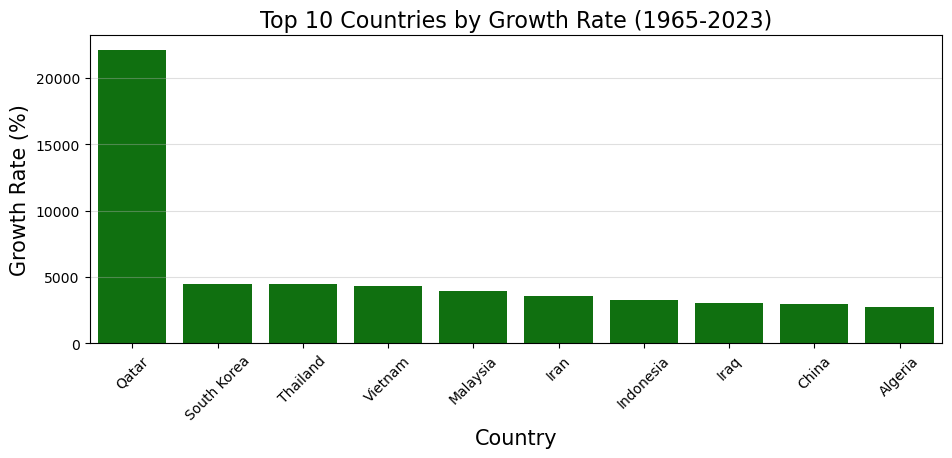

In [9]:
def growth_rate(data, startYear, endYear):
    """
    Calculates the growth rate between a start and end year and adds it as a new column.

    Args:
        data (pd.DataFrame): The input dataframe.
        startYear (str): The starting year for the calculation.
        endYear (str): The ending year for the calculation.

    Returns:
        pd.DataFrame: The dataframe with the new 'Growth_Rate' column.
    """
    # Calculate growth rate, handling potential division by zero
    start_data = data[startYear]
    end_data = data[endYear]
    
    # Replace 0 in start_data with a small number to avoid division by zero, or handle it as NaN
    data["Growth_Rate"] = ((end_data - start_data) / start_data.replace(0, np.nan)) * 100
    return data

# Calculate growth rate and get the top 10 countries
growth_data = growth_rate(data.copy(), "1965", "2023")
top_countries_growth_year = growth_data[~growth_data['Country'].str.contains('Total|OECD|Union', na=False)].sort_values(by="Growth_Rate", ascending=False).head(10)

print("Top 10 Countries by Energy Consumption Growth Rate (1965-2023):")
print(top_countries_growth_year[["Country", "Growth_Rate"]])

# Plot the results
plt.figure(figsize=(11, 4))
sns.barplot(data=top_countries_growth_year, x="Country", y="Growth_Rate", color="green")
plt.title("Top 10 Countries by Growth Rate (1965-2023)", fontsize=16)
plt.ylabel("Growth Rate (%)", fontsize=15)
plt.xlabel("Country", fontsize=15)
plt.grid(axis='y', alpha=0.4)
plt.xticks(rotation=45)
plt.show()

**Analysis:**
The results are striking. Countries like Qatar, South Korea, and Thailand show growth rates in the thousands of percent. This reflects their massive economic and industrial transformations from the mid-20th century to the present day. This list is dominated by Middle Eastern and Asian economies, highlighting the global shift in industrial and economic power over the last 60 years.

### 4.2. Separating Countries and Regions

For our final analysis, it's useful to separate the dataset into two distinct DataFrames: one containing only individual countries and another for aggregated regions. This prevents aggregates like "Total World" from skewing the country-level comparisons.

In [10]:
# List of known region/aggregate names in the 'Country' column
regions = [
    'Total North America', 'Total S. & Cent. America', 'Total Europe', 
    'Total CIS', 'Total Middle East', 'Total Africa', 'Total Asia Pacific', 
    'Total World', 'of which: OECD', 'Non-OECD', 'European Union #'
]

# Create a new DataFrame for regions using .isin()
regions_data = data[data['Country'].isin(regions)].copy()

# Create the countries DataFrame by excluding the regions
countries_data = data[~data['Country'].isin(regions)].copy()

print("Regions DataFrame:")
display(regions_data.head(3))

print("\nCountries DataFrame:")
display(countries_data.head(3))

Regions DataFrame:


,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
3,Total North America,58.04,61.33,63.51,67.36,70.95,73.72,75.39,79.41,83.16,...,116.04,115.10,115.07,115.76,119.25,118.40,109.75,115.20,117.90,116.68
15,Total S. & Cent. America,4.92,5.21,5.41,5.73,5.98,6.40,6.77,7.30,8.01,...,29.71,29.57,29.44,29.65,29.37,29.19,26.92,28.99,30.37,31.28
50,Total Europe,44.82,46.17,47.52,50.67,54.33,57.84,59.37,62.18,65.75,...,83.23,84.05,85.06,86.19,86.21,84.90,79.16,83.01,79.60,77.85



Countries DataFrame:


,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Canada,5.00,5.32,5.57,5.92,6.28,6.73,6.94,7.47,8.11,...,14.43,14.47,14.34,14.54,14.72,14.64,13.76,13.92,14.30,13.95
1,Mexico,1.06,1.12,1.14,1.24,1.36,1.45,1.53,1.69,1.82,...,8.03,7.94,8.11,8.26,8.15,8.07,7.35,7.83,8.18,8.45
2,US,51.98,54.89,56.80,60.19,63.30,65.54,66.92,70.25,73.22,...,93.59,92.69,92.62,92.97,96.37,95.68,88.64,93.44,95.42,94.28


## 5. Final Insights: Top Consumers in 2023

Using our segmented data, let's identify the top 10 energy consumers in the most recent year, 2023, for both countries and regions.

### 5.1. Top 10 Energy Consuming Countries in 2023

Top 10 Countries by Energy Consumption in 2023:
                               Country    2023
101                           Non-OECD  389.73
82                               China  170.74
2                                   US   94.28
102                   European Union #   56.38
84                               India   39.02
54                  Russian Federation   31.29
86                               Japan   17.40
0                               Canada   13.95
5                               Brazil   13.87
60                                Iran   12.71


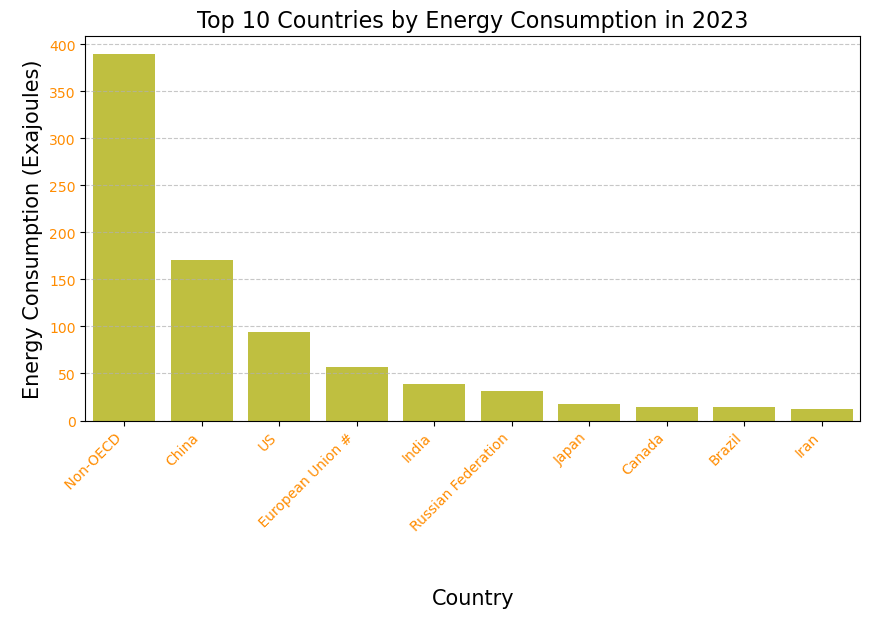

In [11]:
# Sort countries data by 2023 consumption in descending order and get the top 10
top_countries_2023 = countries_data[["Country", '2023']].sort_values(by='2023', ascending=False).head(10)

print("Top 10 Countries by Energy Consumption in 2023:")
print(top_countries_2023)

# Plotting
c = (255/255, 140/255, 0/255) # Custom color for a professional look
plt.figure(figsize=(10, 5))
sns.barplot(data=top_countries_2023, x='Country', y="2023", color="yellow", saturation=0.5)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Energy Consumption (Exajoules)", fontsize=15)
plt.xticks(rotation=45, ha="right", color=c)
plt.yticks(color=c)
plt.title("Top 10 Countries by Energy Consumption in 2023", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analysis:**
In 2023, China is by far the world's largest energy consumer, followed by the US and India. This ranking highlights the current economic powerhouses of the world. The presence of countries like Russia, Japan, and Canada underscores their status as major industrial nations.

### 5.2. Top 10 Energy Consuming Regions in 2023

Top 10 Regions by Energy Consumption in 2023:
                      Country    2023
99                Total World  619.63
98         Total Asia Pacific  291.77
100            of which: OECD  229.90
3         Total North America  116.68
50               Total Europe   77.85
59                  Total CIS   40.72
69          Total Middle East   40.46
15   Total S. & Cent. America   31.28
79               Total Africa   20.87


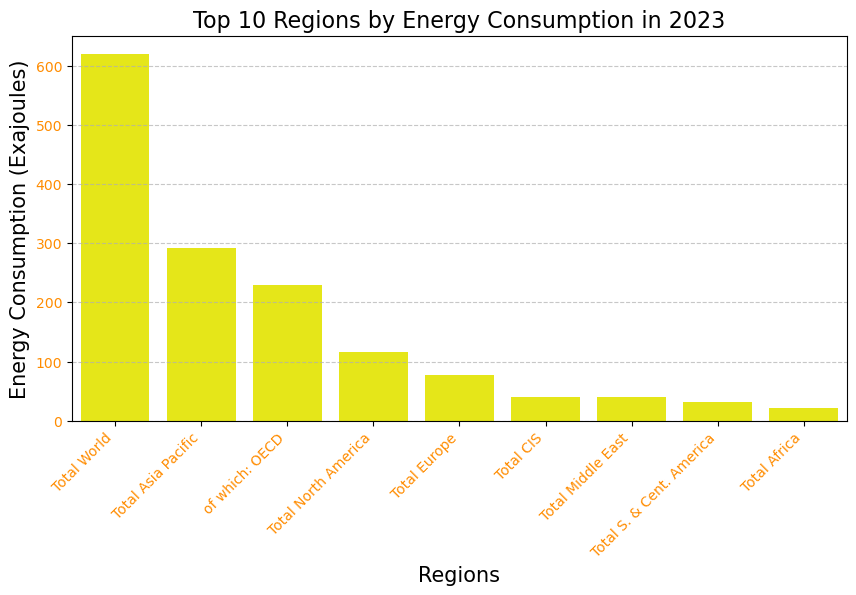

In [12]:
# Sort regions data by 2023 consumption in descending order and get the top 10
top_regions_2023 = regions_data[['Country', '2023']].sort_values(by='2023', ascending=False).head(10)

print("Top 10 Regions by Energy Consumption in 2023:")
print(top_regions_2023)

# Plotting
c = (255/255, 140/255, 0/255)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_regions_2023, x='Country', y="2023", color="yellow", saturation=0.8)
plt.xlabel("Regions", fontsize=15)
plt.ylabel("Energy Consumption (Exajoules)", fontsize=15)
plt.xticks(rotation=45, ha="right", color=c)
plt.yticks(color=c)
plt.title("Top 10 Regions by Energy Consumption in 2023", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analysis:**
On a regional basis, the Asia Pacific region is the dominant energy consumer, which aligns with the country-level data showing China and India in the top three. The clear distinction between Non-OECD and OECD countries, with Non-OECD consumption being significantly higher, confirms the global shift of industrial and energy-intensive activities to emerging economies.

## 6. Project Summary & Conclusion

This analysis has provided a comprehensive overview of global energy consumption trends over the past 59 years. We have successfully cleaned the data, built functions for versatile visualization, and derived key insights:

-   **Global Trend:** Energy consumption has seen a consistent and dramatic rise globally.
-   **Shifting Power:** While the US was a dominant force in the 20th century, China has emerged as the clear leader in the 21st, with the Asia Pacific region now being the largest energy-consuming bloc.
-   **Rapid Growth:** Emerging economies, particularly in the Middle East and Asia, have experienced exponential growth in energy usage, reflecting their rapid industrialization.

This notebook serves as a valuable resource for understanding historical and current patterns in world energy consumption.